### Setup

In [1]:
import os, pickle, sys, re
import numpy as np
import matplotlib.pyplot as plt

from statistics import mean, stdev

### Function definitions

In [2]:
def load_corpus( path_to_corpus_dir ):
    """
    Returns the list of files in the input directory and the files' compiled contents.
    
    Arguments:
    
        path_to_corpus_dir: str or Path obj to the directory containing the files.
        
    Returns:
    
        files_list: list of paths to each file in the input directory.
        
        corpus_contents: list of strings, where each string is one file's contents.
        
    """
    try:
        assert os.path.isdir( path_to_corpus_dir )
    except AssertionError:
        if 'win' in sys.platform:
            new_path= '\\\\?\\' + path_to_corpus_dir
            path_to_corpus_dir = new_path
            assert os.path.isdir( path_to_corpus_dir )
    
    files_list =    [ os.path.join( path_to_corpus_dir, f ) for f in os.listdir( path_to_corpus_dir )
                      if os.path.isfile( os.path.join( path_to_corpus_dir, f ) ) and '.txt' in f
                    ]

    corpus_contents = []
    for f in files_list:
        with open( f, 'r', encoding="utf8" ) as handle:
            corpus_contents.append( handle.readlines() )
    
    return files_list, corpus_contents
    

In [3]:
pos_test_list, pos_contents = load_corpus( os.path.join( os.getcwd(), 'train', 'train', 'pos' ) )
assert len( pos_test_list ) == 12500

### Sanity-checking the output of load_corpus

In [4]:
path_ptc = '\\\\?\\'+os.path.join( os.getcwd(), 'train', 'train', 'pos' )
ptc_files = [ os.path.join( path_ptc, f ) for f in os.listdir( path_ptc ) 
             if os.path.isfile( os.path.join( path_ptc, f ) )
             and '.txt' in f 
            ]

assert len( ptc_files ) == 12500
assert set( [ '\\\\?\\'+t for t in pos_test_list ] ) == set( ptc_files )

In [5]:
neg_test_list, neg_contents = load_corpus( os.path.join( os.getcwd(), 'train', 'train', 'neg' ) )
assert len( neg_test_list ) == 12500

(52, 13704)


<IPython.core.display.Javascript object>


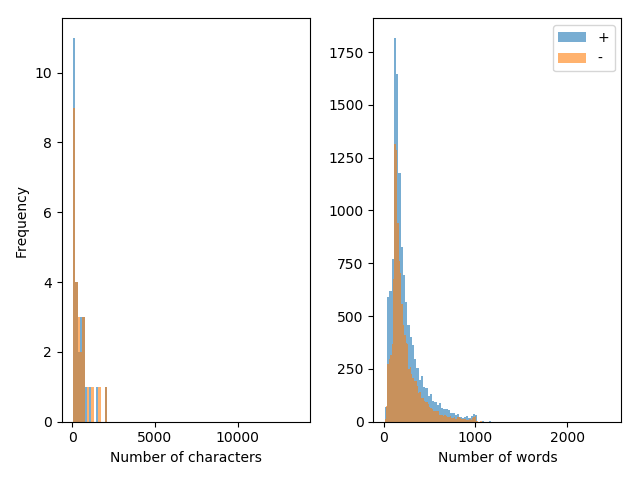

In [6]:
%matplotlib notebook

pf_char_lengths, nf_char_lengths = [ len( pf[0] ) for pf in pos_contents ], [ len( nf[0] ) for nf in neg_contents ]
pf_word_lengths, nf_word_lengths = [ len( pf[0].split() ) for pf in pos_contents ], [ len( nf[0].split() ) for nf in neg_contents ]

# setting up histogram bins
char_bin_range = (  min( min( pf_char_lengths ), min( nf_char_lengths ) ),
                    max( max( pf_char_lengths ), max( nf_char_lengths ) )             
                 )

char_length_mean = mean( pf_char_lengths + nf_char_lengths )
char_length_stdev = stdev( pf_char_lengths + nf_char_lengths )



char_bins = np.linspace( char_bin_range[0], char_bin_range[1], num=100, endpoint=True )

print( char_bin_range )

pos_char_length_freq, _ = np.histogram( pf_char_lengths, bins=char_bins )
neg_char_length_freq, _ = np.histogram( nf_char_lengths, bins=char_bins )


fig, ax = plt.subplots(1,2)
ax[0].hist( pos_char_length_freq, bins=char_bins, alpha=0.6, label='+' )
ax[0].hist( neg_char_length_freq, bins=char_bins, alpha=0.6, label='-' )
ax[0].set_ylabel("Frequency")
ax[0].set_xlabel("Number of characters")

ax[1].hist( pf_word_lengths, bins=100, alpha=0.6, label='+' )
ax[1].hist( nf_word_lengths, bins=100, alpha=0.6, label='-' )
ax[1].set_xlabel("Number of words")

plt.tight_layout()
plt.legend(loc="upper right")
plt.show()



In [7]:
not_contraction_count_p = sum( [ 1 for pfc in pos_contents if "n't" in pfc[0] ] )
not_contraction_count_f = sum( [ 1 for nfc in neg_contents if "n't" in nfc[0] ] )
print( f"pos: {not_contraction_count_p}, neg: {not_contraction_count_f}" )

pos: 6552, neg: 8283


In [9]:
for pfc in pos_contents:
    if "n't" in pfc[0]:
        index = pfc[0].index( "n't" )
        print( pfc[0][index-10:index+20] )

that it isn't!
here he can't step off the sid

ile you don't even notice it h
s Jess) don't seem, initially,
hat he didn't anticipate.<br /
gh it doesn't include a serial
? That didn't work before!" PL
e maybe won't like the slow pa
tter. I don't think it was bad
t and doesn't sew-up any of th
rayal doesn't do much to makes
illiams isn't terrific, but he
tely. I won't give a shred of 
gh it doesn't top his first mo
nces. I won't go into too much
<br />I don't mean -and don't 
oject needn't have been comple
vie and won't do a film for le
best. I don't think anyone cou
d they didn't like it any more
m. Just don't expect fireworks
s movie isn't exactly dumb, bu
eally doesn't like the movie t
f you haven't seen this film y
ckly. I don't think it is over
 movie didn't!!! Director, Jam
 movies don't) but still, it's
 movie didn't have a solid ten
l. It doesn't resort to the bi
acters aren't given a lot to d
ster. I don't think anybody co
ere you don't just watch the f
ut it doesn't take away

nd it doesn't matter if it's s
ad she wasn't playing a gangst
, but I can't think of anyone 
ndage," don't read the book be
y just didn't have as much to 
studio didn't push for her. He
ndage" didn't seem to have a s
rehe doesn't even seem partic
this, I can't believe it was r
ly. It wasn't as gruesome as t
eration isn't at all a bad mov
ties mightn't realise this and
op, she can't read and she not
ime. It isn't the same as emot
he AFI didn't award her perfor
augham didn't care for distaff
, but I don't see how any acto
goes. I won't deny that. Howev
ildred wasn't married to Emil 
ldred doesn't care for Philip 
onally didn't care much for Ho
and i haven't seen this film f
s. They can't do much about th
owdown! Don't mess with Manchu
ut they can't go unless the cl
lms you don't want to miss thi
e, I couldn't resist giving it
ngs!! I won't say more, as it 
r />- I can't help but compare
ut. It wasn't of course until 
 you wouldn't easily forget th
you shouldn't be laughing, you
while. H

Eyre couldn't really be happy 
film. I can't say for sure, bu
ough I didn't like the ending,
rich. I can't help but think h
ss, you can't help but enjoy i
y, it doesn't quite work as pa
now. I didn't know a thing abo
imply doesn't understand the m
ually a can't miss. Inspiratio
r. It doesn't matter what side
nes who don't think of combata
ine. I didn't know what to exp
use he didn't kill people the 
 too. I don't want to spoil a 
ho I couldn't help but feel sl
... I haven't seen anything th
movies aren't supposed to be S
classic isn't appropriate, and
good. I can't wait to get the 
ts. And don't forget the explo
g if I didn't say I wished tha
ng. It wasn't. Nothing could b
sembled don't quite make it al
/>"I couldn't think of any met
ts that can't do anything film
. It wouldn't have been a big 
es, it wasn't picked up for st
out. I didn't find Justin's ac
elberg hasn't developed techni
ories doesn't know that.He kil
ts, you can't call this movie 
 />It doesn't take Columbo lon
ope. I d

ut (Now don't ever tell me the
ove You Don't Touch Me) direct
acting wasn't that good and th
rothers won't take the throne 
art and isn't really what his 
enes, I don't think any wires 
And it didn't show us any unne
"PC" or don't have a seriously
That Couldn't be Farther from 
<br />I don't think Jack Frost
ommy wouldn't have been fighti
up, but don't let any crude an
ward. I don't understand the p
if they won't admit it. I have
movie doesn't have quite such 
, so I didn't recall much of i
that I didn't quite get the en
mother didn't think it was bad
 cast weren't around to do it 
ia he doesn't recognize the gr
ally wouldn't have crossed liv
g that wasn't at least compete
es just don't capture. I parti
nsbury didn't get to be one of
and you can't help but singing
. She doesn't want them but re
t, kids don't care too much ab
n and I don't know why people 
dget couldn't stretch to make 
 that doesn't try to take itse
 if it wasn't for the heart-wa
cingly. Don't be put off by th
re). It 

d who doesn't want to have sex
 think. Don't expect the class
movies aren't particularly sea
yes, it won't be true if i say
ries, i don't think that it is
. "ok, wasn't quite expecting 
ole you don't normally see Dre
br />I didn't get the ending! 
d time. Don't take the film al
really wasn't based on Dodie S
t it wouldn't be a Dalmatian'
iffith aren't so good in actin
ies who don't like each other"
ou just can't put down. Highly
kfully wasn't unnecessary like
 that doesn't aim as high as i
if they don't do as they are t
itely doesn't deserve one, but
I still don't know why they wa
ess it wasn't and it was a ver
eenplay isn't very good, and t
e movie isn't great thing but 
 but he isn't. <br /><br />He'
ot that can't be figured out a
 -- you won't be disappointed!
asting didn't seem right. Kief
it, you can't forget it. This 
 people don't like this movie,
 just doesn't get any better t
that we don't share with them 
old. i wasn't disappointed . G
but it wasn't over the top. An
riters d